### 2026/01/08

In [1]:
# 로그 파일 (반정형 데이터) -> 정형 데이터 형식(데이터프레임)

import re 
import csv

In [2]:
# 로그 파일의 경로
log_file_path = 'sample_logs.log'
output_csv_path = 'parsed_logs.csv'


In [3]:
# 정규표현식 패턴 정의

log_pattern = re.compile(
r'(?P<ip>\d+\.\d+\.\d+\.\d+)\s'           # IP 주소
r'- - \[(?P<datetime>[^\]]+)\] '          # 날짜 및 시간
r'"(?P<method>GET|POST|PUT|DELETE|HEAD) ' # HTTP 메서드
r'(?P<path>[^ ]+).*?"\s'                  # 요청 경로
r'(?P<status>\d{3})\s'                    # 상태 코드
r'(?P<size>\d+)'                          # 응답 크기
)

# (?P<이름>패턴) 이름이 있는 그룹으로 처리 => 추출 결과를 dict 관리
# groupdict()

In [7]:
# 파싱된 경과를 리스트로 저장
parsed_logs = []

# 로그 파일을 읽고, 정규식을 적용 결과를 확인
with open(log_file_path, 'r') as f:
    for line in f:
        match = log_pattern.search(line)

        if match:
            parsed_logs.append(match.groupdict())


In [8]:
parsed_logs

[{'ip': '172.29.117.82',
  'datetime': '14/Jun/2025:10:59:11 +0900',
  'method': 'GET',
  'path': '/home.php',
  'status': '200',
  'size': '189'},
 {'ip': '10.248.203.131',
  'datetime': '14/Jun/2025:11:21:30 +0900',
  'method': 'GET',
  'path': '/admin/login.php',
  'status': '403',
  'size': '1024'},
 {'ip': '172.25.180.188',
  'datetime': '14/Jun/2025:11:55:08 +0900',
  'method': 'GET',
  'path': '/admin/login.php',
  'status': '404',
  'size': '2048'},
 {'ip': '172.22.253.123',
  'datetime': '14/Jun/2025:11:18:27 +0900',
  'method': 'GET',
  'path': '/dashboard',
  'status': '403',
  'size': '512'},
 {'ip': '192.168.71.140',
  'datetime': '14/Jun/2025:10:38:19 +0900',
  'method': 'GET',
  'path': '/admin/login.php',
  'status': '404',
  'size': '512'},
 {'ip': '10.128.66.93',
  'datetime': '14/Jun/2025:10:35:59 +0900',
  'method': 'GET',
  'path': '/home.php',
  'status': '404',
  'size': '1024'},
 {'ip': '192.168.75.62',
  'datetime': '14/Jun/2025:10:38:37 +0900',
  'method': 'GE

In [13]:
with open(output_csv_path, 'w', newline = '') as csvfile:
    # 라벨 : 필드이름 정의
    fieldnames = ['ip', 'datetime', 'method', 'path', 'status', 'size']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    # 해더 : 라벨쓰기
    writer.writeheader()
    for row in parsed_logs:
        # 한줄씩 쓰기
        writer.writerow(row)
    
    print('보안 관련 로그를 csv 파일로 저장')


보안 관련 로그를 csv 파일로 저장


In [14]:
# csv => Dataframe
import pandas as pd

In [17]:
# 1. 파일 읽
df = pd.read_csv('parsed_logs.csv')
df = pd.DataFrame(df)

In [18]:
# status => 403
df_403 = df[df['status']==403] # status == 403
print(df_403)

                 ip                    datetime method              path  \
1    10.248.203.131  14/Jun/2025:11:21:30 +0900    GET  /admin/login.php   
3    172.22.253.123  14/Jun/2025:11:18:27 +0900    GET        /dashboard   
10   192.168.133.95  14/Jun/2025:10:35:49 +0900   POST         /api/data   
17      10.72.245.6  14/Jun/2025:11:09:56 +0900    GET        /dashboard   
18    192.168.41.48  14/Jun/2025:11:37:38 +0900   POST         /api/data   
..              ...                         ...    ...               ...   
469  172.29.118.196  14/Jun/2025:11:36:35 +0900   POST         /api/data   
478  10.170.116.238  14/Jun/2025:11:45:43 +0900   POST       /upload.php   
482     10.223.64.6  14/Jun/2025:10:46:13 +0900    GET         /home.php   
490  192.168.24.241  14/Jun/2025:10:30:29 +0900    GET         /home.php   
498  172.27.113.162  14/Jun/2025:10:02:40 +0900   POST           /submit   

     status  size  
1       403  1024  
3       403   512  
10      403   189  
17     

In [20]:
# path => /admin/...
acc_admin_df = df[df['path'].str.contains(r'^/admin')]
print(acc_admin_df)
print(acc_admin_df.info())

                 ip                    datetime method              path  \
1    10.248.203.131  14/Jun/2025:11:21:30 +0900    GET  /admin/login.php   
2    172.25.180.188  14/Jun/2025:11:55:08 +0900    GET  /admin/login.php   
4    192.168.71.140  14/Jun/2025:10:38:19 +0900    GET  /admin/login.php   
15     10.32.63.121  14/Jun/2025:11:24:03 +0900    GET  /admin/login.php   
28      10.41.22.78  14/Jun/2025:10:59:14 +0900    GET  /admin/login.php   
..              ...                         ...    ...               ...   
452    10.63.41.199  14/Jun/2025:10:45:49 +0900    GET  /admin/login.php   
458     10.49.1.244  14/Jun/2025:10:06:23 +0900    GET  /admin/login.php   
462  10.172.229.215  14/Jun/2025:10:35:40 +0900    GET  /admin/login.php   
480  172.28.207.249  14/Jun/2025:10:51:43 +0900    GET  /admin/login.php   
494  192.168.86.214  14/Jun/2025:10:38:34 +0900    GET  /admin/login.php   

     status  size  
1       403  1024  
2       404  2048  
4       404   512  
15     

In [24]:
# ip 집계 => 상위 TOP5
top_ips = df.groupby('ip').size().reset_index(name = 'count').sort_values(by='count', ascending=False)

print(top_ips.head())


                  ip  count
441  192.168.234.214      2
467    192.168.53.18      1
18      10.127.95.68      1
0     10.101.163.240      1
468    192.168.55.77      1


In [25]:
# 서울시에 위치한 스타벅스 데이터 

import pandas as pd

In [26]:
df = pd.read_csv('fulldata.csv', encoding = 'cp949', low_memory = False)

In [28]:
df.head(3)

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,공장생산직직원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
0,1,휴게음식점,07_24_05_P,3780000,3810000-104-2025-00053,2025-02-11,NaN,3,폐업,2,...,0.0,NaN,0.0,0.0,N,0.0,NaN,NaN,NaN,NaN
1,2,휴게음식점,07_24_05_P,3780000,3810000-104-2025-00052,2025-02-11,NaN,3,폐업,2,...,0.0,NaN,0.0,0.0,N,0.0,NaN,NaN,NaN,NaN
2,3,휴게음식점,07_24_05_P,5710000,5735000-104-2025-00006,2025-02-12,NaN,3,폐업,2,...,0.0,NaN,0.0,0.0,N,184.0,NaN,NaN,NaN,NaN


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622850 entries, 0 to 622849
Data columns (total 48 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   번호               622850 non-null  int64  
 1   개방서비스명           622850 non-null  object 
 2   개방서비스아이디         622850 non-null  object 
 3   개방자치단체코드         622850 non-null  int64  
 4   관리번호             622850 non-null  object 
 5   인허가일자            622831 non-null  object 
 6   인허가취소일자          0 non-null       float64
 7   영업상태구분코드         622850 non-null  int64  
 8   영업상태명            622850 non-null  object 
 9   상세영업상태코드         622850 non-null  int64  
 10  상세영업상태명          622850 non-null  object 
 11  폐업일자             425283 non-null  object 
 12  휴업시작일자           0 non-null       float64
 13  휴업종료일자           0 non-null       float64
 14  재개업일자            0 non-null       float64
 15  소재지전화            251854 non-null  object 
 16  소재지면적            569219 non-null  floa

In [30]:
df.shape

(622850, 48)

In [31]:
df.describe()

,번호,개방자치단체코드,인허가취소일자,영업상태구분코드,상세영업상태코드,휴업시작일자,휴업종료일자,재개업일자,소재지면적,도로명우편번호,...,총직원수,본사직원수,공장사무직직원수,공장판매직직원수,공장생산직직원수,보증액,월세액,시설총규모,홈페이지,Unnamed: 47
count,622850.00000,6.228500e+05,0.0,622850.000000,622850.000000,0.0,0.0,0.0,569219.000000,468239.000000,...,287102.0,291368.0,291368.0,291368.0,291368.0,291368.0,291368.0,621064.000000,0.0,0.0
mean,311425.50000,4.061567e+06,NaN,2.365606,1.682803,NaN,NaN,NaN,52.029507,27960.956571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.416189,NaN,NaN
std,179801.45192,8.817594e+05,NaN,0.930770,0.465385,NaN,NaN,NaN,361.266608,18772.197465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,346.180167,NaN,NaN
min,1.00000,3.000000e+06,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,1000.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
25%,155713.25000,3.310000e+06,NaN,1.000000,1.000000,NaN,NaN,NaN,14.800000,10930.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.000000,NaN,NaN
50%,311425.50000,3.820000e+06,NaN,3.000000,2.000000,NaN,NaN,NaN,33.300000,24702.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.810000,NaN,NaN
75%,467137.75000,4.681000e+06,NaN,3.000000,2.000000,NaN,NaN,NaN,62.640000,44686.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.580000,NaN,NaN
max,622850.00000,6.520000e+06,NaN,3.000000,2.000000,NaN,NaN,NaN,151000.000000,63644.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151000.000000,NaN,NaN


In [36]:
print(df.columns.tolist())
print(df.columns.values)

['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자', '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자', '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호', '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보x(epsg5174)', '좌표정보y(epsg5174)', '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명', '급수시설구분명', '총직원수', '본사직원수', '공장사무직직원수', '공장판매직직원수', '공장생산직직원수', '건물소유구분명', '보증액', '월세액', '다중이용업소여부', '시설총규모', '전통업소지정번호', '전통업소주된음식', '홈페이지', 'Unnamed: 47']
['번호' '개방서비스명' '개방서비스아이디' '개방자치단체코드' '관리번호' '인허가일자' '인허가취소일자' '영업상태구분코드'
 '영업상태명' '상세영업상태코드' '상세영업상태명' '폐업일자' '휴업시작일자' '휴업종료일자' '재개업일자' '소재지전화'
 '소재지면적' '소재지우편번호' '소재지전체주소' '도로명전체주소' '도로명우편번호' '사업장명' '최종수정시점' '데이터갱신구분'
 '데이터갱신일자' '업태구분명' '좌표정보x(epsg5174)' '좌표정보y(epsg5174)' '위생업태명' '남성종사자수'
 '여성종사자수' '영업장주변구분명' '등급구분명' '급수시설구분명' '총직원수' '본사직원수' '공장사무직직원수'
 '공장판매직직원수' '공장생산직직원수' '건물소유구분명' '보증액' '월세액' '다중이용업소여부' '시설총규모' '전통업소지정번호'
 '전통업소주된음식' '홈페이지' 'Unnamed: 47']


In [39]:
data_1 = df[['번호', '영업상태명', '사업장명', '소재지전체주소','도로명전체주소']]
data_1

,번호,영업상태명,사업장명,소재지전체주소,도로명전체주소
0,1,폐업,오린지-한시적,경기도 성남시 분당구 백현동 541 현대백화점 판교점 지하1(일부)층,"경기도 성남시 분당구 판교역로146번길 20, 현대백화점 판교점 지하1(일부)층 (..."
1,2,폐업,리은푸드-한시적,경기도 성남시 분당구 수내동 14 롯데백화점 분당점 지하1(일부)층,"경기도 성남시 분당구 황새울로200번길 45, 롯데백화점 분당점 지하1(일부)층 (..."
2,3,폐업,숲이그린정원,충청북도 청주시 청원구 오창읍 성산리 581-1,"충청북도 청주시 청원구 오창읍 화복로 780-170, 1층"
3,4,폐업,이마트24 마산교방푸르지오점,경상남도 창원시 마산합포구 교방동 536,"경상남도 창원시 마산합포구 교방동18길 14, 231동 1층 104호 (교방동)"
4,5,폐업,헤이키커피 부산시청본점,부산광역시 연제구 연산동 1503-6,"부산광역시 연제구 시청로 30, 1,2층 (연산동)"
...,...,...,...,...,...
622845,622846,영업/정상,GS25HR아팰리스점,광주광역시 남구 봉선동 1095 1층 201동 102호,"광주광역시 남구 제석로 104, 201동 1층 102호 (봉선동)"
622846,622847,영업/정상,석류나무,광주광역시 남구 백운동 620-11번지 1층,"광주광역시 남구 독립로 30-3, 1층 (백운동)"
622847,622848,영업/정상,블랑PC토랑,"광주광역시 남구 진월동 294-17 광동빌딩, 2층","광주광역시 남구 서문대로 700, 광동빌딩 2층 (진월동)"
622848,622849,영업/정상,아틀리에pc,광주광역시 남구 월산동 901-30 1층,"광주광역시 남구 월산로151번길 10, 땡큐pc방 1층 (월산동)"


In [41]:
# 소재지 기준으로 값이 NaN인 행을 삭제

data_1 = data_1.dropna(subset = ['소재지전체주소'])
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 621027 entries, 0 to 622849
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   번호       621027 non-null  int64 
 1   영업상태명    621027 non-null  object
 2   사업장명     621027 non-null  object
 3   소재지전체주소  621027 non-null  object
 4   도로명전체주소  476124 non-null  object
dtypes: int64(1), object(4)
memory usage: 28.4+ MB


In [42]:
data_2 = data_1[data_1['소재지전체주소'].str.contains('서울특별')]
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141791 entries, 6 to 617626
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   번호       141791 non-null  int64 
 1   영업상태명    141791 non-null  object
 2   사업장명     141791 non-null  object
 3   소재지전체주소  141791 non-null  object
 4   도로명전체주소  100200 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.5+ MB


In [44]:
# 사업장명 => 스탁벅스 찾기

data_3 = data_2[data_2['사업장명'].str.contains('스타벅스')]

In [45]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 841 entries, 5456 to 616131
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   번호       841 non-null    int64 
 1   영업상태명    841 non-null    object
 2   사업장명     841 non-null    object
 3   소재지전체주소  841 non-null    object
 4   도로명전체주소  783 non-null    object
dtypes: int64(1), object(4)
memory usage: 39.4+ KB


In [46]:
data_4 = data_3[data_3['영업상태명'] != '페업']
data_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 841 entries, 5456 to 616131
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   번호       841 non-null    int64 
 1   영업상태명    841 non-null    object
 2   사업장명     841 non-null    object
 3   소재지전체주소  841 non-null    object
 4   도로명전체주소  783 non-null    object
dtypes: int64(1), object(4)
memory usage: 39.4+ KB


In [52]:
# 열 추가 : 시군구
data_4.loc[:, '시군구'] = data_4['소재지전체주소'].str.split().str[1]
data_4.head()


,번호,영업상태명,사업장명,소재지전체주소,도로명전체주소,시군구
5456,5457,폐업,스타벅스 대치재경빌딩B1,서울특별시 강남구 대치동 599 대원빌딩,"서울특별시 강남구 남부순환로 2947, 대원빌딩 지하1층 (대치동)",강남구
13310,13311,폐업,스타벅스 명동센트럴점,서울특별시 중구 명동1가 10-1 명동센트럴빌딩 1층-중2층,"서울특별시 중구 명동9길 16, 명동센트럴빌딩 1층-중2층 (명동1가)",중구
16014,16015,폐업,스타벅스커피홍대공원점,"서울특별시 마포구 서교동 362-1번지 1층일부, 2층","서울특별시 마포구 와우산로 83 (서교동, 1층일부, 2층)",마포구
16775,16776,폐업,스타벅스커피서교점,서울특별시 마포구 서교동 395-166 1층일부,"서울특별시 마포구 양화로 78 (서교동, 1층일부)",마포구
17982,17983,폐업,스타벅스 뱅뱅사거리점,"서울특별시 강남구 도곡동 946-14 지상1,2,3층","서울특별시 강남구 강남대로 282 (도곡동,지상1,2,3층)",강남구


In [53]:
data_5 = data_4.groupby('시군구').size().reset_index(name = '사업장수')
data_5

,시군구,사업장수
0,강남구,136
1,강동구,26
2,강북구,7
3,강서구,38
4,관악구,17
5,광진구,28
6,구로구,18
7,금천구,17
8,노원구,16
9,도봉구,9


In [54]:
import matplotlib.pyplot as plt

In [ ]:
# 한글 처리 설

plt.rcParams['font.family'] = 'Malgun Gothic'

Text(0, 0.5, '사업장 수')

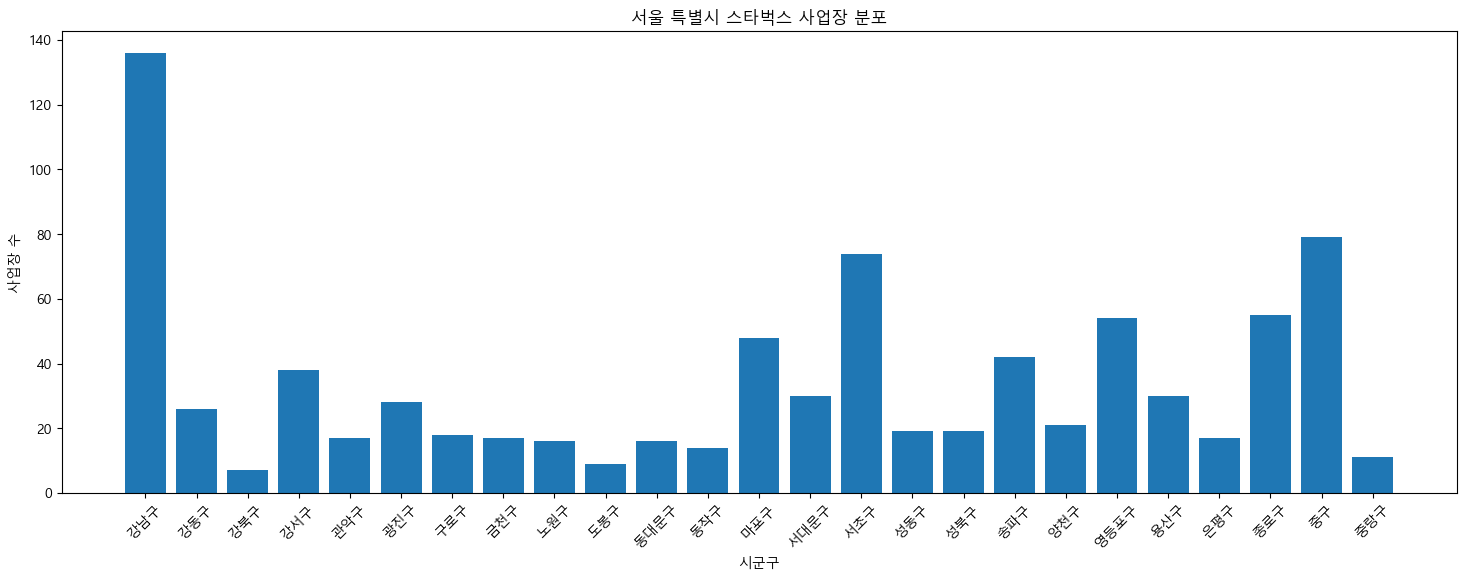

In [61]:
# 차트의 크기

plt.figure(figsize=(18,6))

plt.bar(data_5['시군구'], data_5['사업장수'])
plt.xticks(rotation=45)
plt.title('서울 특별시 스타벅스 사업장 분포')
plt.xlabel('시군구')
plt.ylabel('사업장 수')

